# Computational and Systems Biology
## $\texttt{Analysis of food pairing and food bridging hypotheses}$

Authors:    
1. Vishwa Shah (201801036)
2. Riddhi Tanna (201801427)
3. Dishita Thaker (201801442)


This notebook contains the code for analysing the degree of food pairing and food bridging within cuisines. Once we calculate that, we can classify recipes into one of four kinds: 




1.   **Low** food pairing + **low** food bridging
2.   **Low** food pairing + **high** food bridging 
3.   **High** food pairing + **low** food bridging 
4.   **High** food pairing + **high** food bridging



Note: Change file path accordingly.

## Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

## Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading datasets

In [ ]:
# change file path here
data_fb = pd.read_csv('/content/drive/Shareddrives/FoodBridging/flavor_network_backbone/favor_backbone.csv')
recipe_ing = pd.read_csv('/content/drive/Shareddrives/FoodBridging/flavor_network_backbone/recipe_ingredient.csv', header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
recipe_ing

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,African,chicken,cinnamon,soy_sauce,onion,ginger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African,cane_molasses,ginger,cumin,garlic,tamarind,bread,coriander,vinegar,onion,beef,cayenne,parsley,wheat_bread,yogurt,vegetable_oil,egg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,African,butter,pepper,onion,cardamom,cayenne,ginger,cottage_cheese,garlic,brassica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,African,olive_oil,pepper,wheat,beef,onion,cardamom,cumin,garlic,rice,leek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,African,honey,wheat,yeast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56493,WesternEuropean,cane_molasses,butter,wheat,whiskey,vanilla,egg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56494,WesternEuropean,lemon_juice,wheat,onion,parsley,celery,nutmeg,vegetable_oil,chicken,egg,leek,cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56495,WesternEuropean,butter,wheat,onion,beef,bacon,black_pepper,parsley,beer,garlic,lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56496,WesternEuropean,lemon,onion,black_pepper,white_wine,celery,carrot,mussel,bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
recipe_ing[0].unique()

array(['African', 'EastAsian', 'EasternEuropean', 'LatinAmerican',
       'MiddleEastern', 'NorthAmerican', 'NorthernEuropean', 'SouthAsian',
       'SoutheastAsian', 'SouthernEuropean', 'WesternEuropean'],
      dtype=object)

In [ ]:
cuisines = ['EastAsian', 'LatinAmerican', 'EasternEuropean', 'WesternEuropean', 'SouthernEuropean', 'SoutheastAsian', 'NorthAmerican']

In [ ]:
data_fb.columns = ['source', 'target', 'weight']

In [ ]:
data_fb[['weight']].apply(pd.to_numeric)

,weight
0,3
1,5
2,57
3,1
4,2
...,...
221772,1
221773,6
221774,1
221775,6


## Analysis

In [ ]:
# change file path here
semi_metric = nx.read_edgelist('/content/drive/Shareddrives/FoodBridging/data/semi_metric_2.csv', comments="#", delimiter=",", data=True, encoding="utf-8")
metric = nx.read_edgelist('/content/drive/Shareddrives/FoodBridging/data/metric_2.csv', comments="#", delimiter=",", data=True, encoding="utf-8")
df_reduced = pd.read_csv('/content/drive/Shareddrives/FoodBridging/data/reduced_df_30.csv', delimiter=",", encoding="utf-8")

In [ ]:
df_reduced.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,EastAsian,vinegar,mustard,beef,radish,pear,cucumber,buckwheat,egg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EastAsian,soybean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EastAsian,sesame_oil,vegetable,soy_sauce,rice,cayenne,scallion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EastAsian,nut,watermelon,ginger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EastAsian,vinegar,sesame_oil,shiitake,kelp,vegetable_oil,rice,soy_sauce,brown_rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,NorthAmerican,butter,dill,wheat,thyme,sage,seed,yogurt,cheddar_cheese,egg,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NorthAmerican,beer,bean,kidney_bean,garlic,cayenne,cumin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NorthAmerican,egg,vanilla,wheat,milk,peach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NorthAmerican,butter,banana,rum,cherry,vanilla,walnut,cocoa,pineapple,milk,cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r = np.array(df_reduced[df_reduced.columns[1:]].iloc[0])
r = [e for e in r if type(e) != float] 

---
**Food pairing**

$N_S(R) = \frac{2}{n_R(n_R - 1)} \sum C_i \cap C_j $

---



In [ ]:
df_r2 = df_reduced.drop(['0'], axis = 1)

In [ ]:
unique_nodes = pd.Series(df_r2.values.ravel()).unique()
print('Number of unique nodes in the sub graph of the sample: ', len(pd.Series(df_r2.values.ravel()).unique()))

Number of unique nodes in the sub graph of the sample:  218


In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(data_fb, edge_attr='weight')

In [ ]:
# making a sampled subgraph 
G_sub = G.subgraph(unique_nodes)

In [ ]:
len(df_reduced)

210

In [ ]:
nsr = []
smp = []
num_ing_arr = []
nsr_m = []
for recipe in range(len(df_reduced)):

  #print(recipe)
  # store sum of edge weights
  sum = 0 
  semi_sum = 0
  m_sum = 0
  tot_ed = 0
  # remove nan
  r = np.array(df_reduced[df_reduced.columns[1:]].iloc[int(recipe)])
  r = [e for e in r if type(e) != float] 
  #print(r)
  # get number of ingredients - nr
  num_ing = len(r)
  num_ing_arr.append(num_ing)

  for ing_1 in r:
    for ing_2 in r:
      if ing_1 != ing_2:
        try:
          sum = sum + G_sub.get_edge_data(ing_1, ing_2)['weight']
          tot_ed = tot_ed + 1
          #ed = G_sub.get_edge_data(ing_1, ing_2)
          if semi_metric.has_edge(ing_1, ing_2):
            semi_sum = semi_sum + 1
          if metric.has_edge(ing_1, ing_2):
            m_sum = m_sum + 1
          
        except:
          pass

  # calculating nsr 
  if tot_ed != 0:
    #print(sum, num_ing*(num_ing - 1))
    NSR = (2/(num_ing*(num_ing - 1)))*sum
    #print(NSR)
    nsr.append(NSR)
    smp.append(semi_sum/tot_ed)
    nsr_m.append(m_sum/tot_ed)

In [ ]:
j = 0
dict_nsr = {}
dict_smp = {}
dict_ing = {}
for c in cuisines:
  dict_nsr[c] = np.array(nsr[j:j+30]).mean()
  dict_smp[c] = np.array(smp[j:j+30]).mean()
  dict_ing[c] = np.array(num_ing_arr[j:j+30]).mean()
  j = j + 30

In [ ]:
dict_ing

{'EastAsian': 12.366666666666667,
 'EasternEuropean': 12.233333333333333,
 'LatinAmerican': 13.833333333333334,
 'NorthAmerican': 11.266666666666667,
 'SoutheastAsian': 15.9,
 'SouthernEuropean': 12.566666666666666,
 'WesternEuropean': 12.2}

In [ ]:
nsr_vals = list(dict_nsr.values())
nsr_vals.sort()
smp_vals = list(dict_smp.values())
smp_vals.sort()

In [ ]:
import operator
sorted_nsr = np.array(sorted(dict_nsr.items(), key=operator.itemgetter(1)))
sorted_smp = np.array(sorted(dict_smp.items(), key=operator.itemgetter(1)))
sorted_ing = np.array(sorted(dict_ing.items(), key=operator.itemgetter(1)))

In [ ]:
sorted_ing

array([['NorthAmerican', '11.266666666666667'],
       ['WesternEuropean', '12.2'],
       ['EasternEuropean', '12.233333333333333'],
       ['EastAsian', '12.366666666666667'],
       ['SouthernEuropean', '12.566666666666666'],
       ['LatinAmerican', '13.833333333333334'],
       ['SoutheastAsian', '15.9']], dtype='<U18')

In [ ]:
def chunks(lst, n):
  '''
  Function that returns chunked list
  '''
  for i in range(0, len(lst), n):
    return [lst[i:i + n] for i in range(0, len(lst), n)]

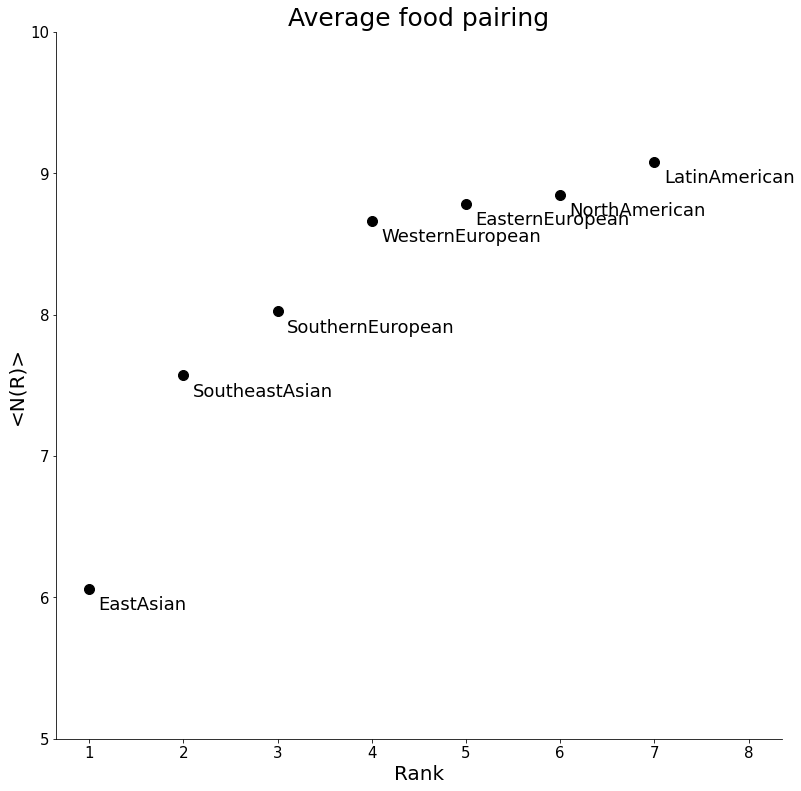

In [ ]:
fig, ax = plt.subplots(figsize = [13,13])
plt.plot(np.arange(1, 9), [float(x) for x in sorted_nsr[:, 1]]+[0], '.', markersize = 20, color = 'k')

for label, x, y in zip(sorted_nsr[:, 0], np.arange(1, len(cuisines)+1), [float(x) for x in sorted_nsr[:, 1]]):
    plt.annotate(label, xy = (x+0.1, y-0.15), fontsize = 18)

ax.set_ylim(5, 10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)


plt.ylabel('<N(R)>', fontsize = 20)
plt.xlabel('Rank', fontsize = 20)
plt.title('Average food pairing', fontsize = 25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

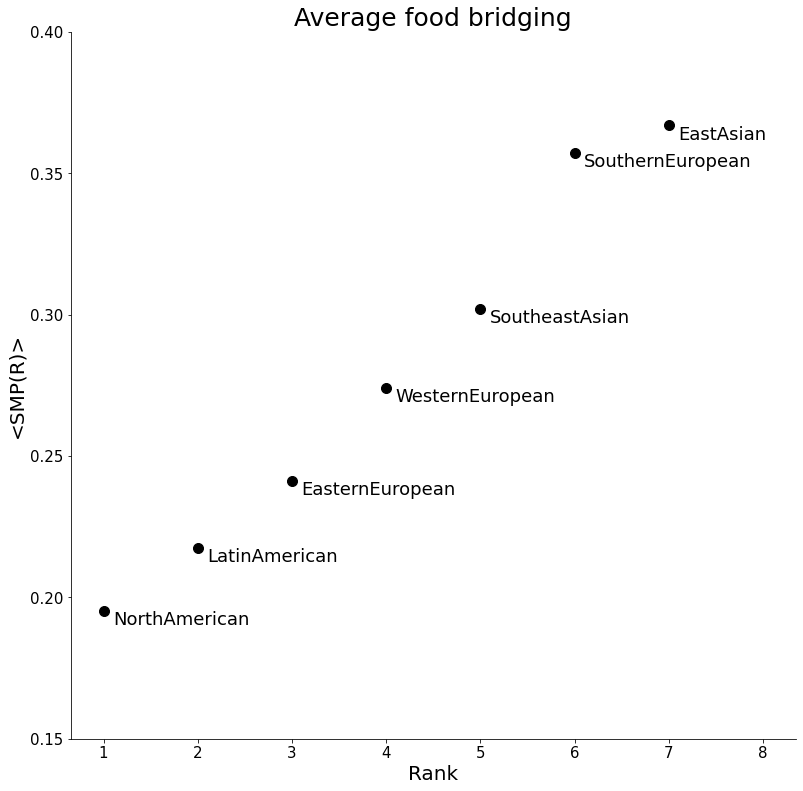

In [ ]:
fig, ax = plt.subplots(figsize = [13,13])
plt.plot(np.arange(1, 9), [float(x) for x in sorted_smp[:, 1]]+[-1], '.', markersize = 20, color = 'k')

for label, x, y in zip(sorted_smp[:, 0], np.arange(1, len(cuisines)+1), [float(x) for x in sorted_smp[:, 1]]):
    plt.annotate(label, xy = (x+0.1, y-0.005), fontsize = 18)

ax.set_ylim(0.15, 0.4)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)


plt.ylabel('<SMP(R)>', fontsize = 20)
plt.xlabel('Rank', fontsize = 20)
plt.title('Average food bridging', fontsize = 25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

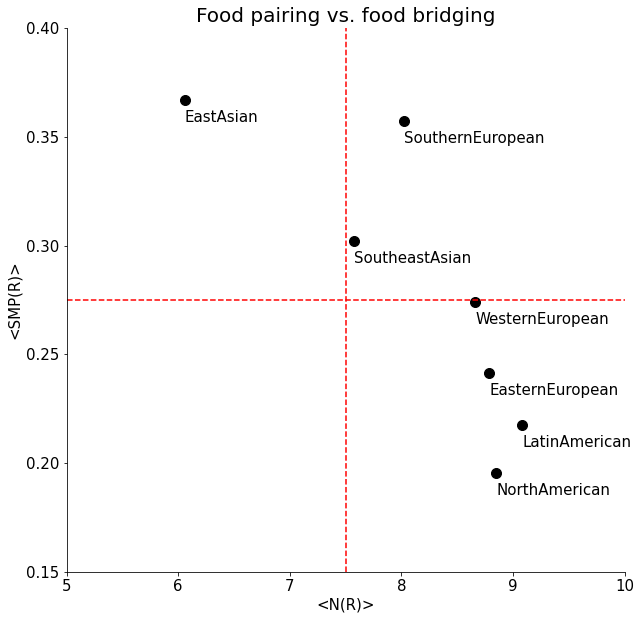

In [ ]:
fig, ax = plt.subplots(figsize = [10,10])
plt.plot(list(dict_nsr.values()), list(dict_smp.values()), '.', markersize=20, color = 'k')
ax.set_xlim([5, 10])
ax.set_ylim([0.15, 0.4])
for label, x, y in zip(list(dict_nsr.keys()), list(dict_nsr.values()), list(dict_smp.values())):
    plt.annotate(label, xy = (x, y-0.01), fontsize = 15)
plt.axhline(y=0.275, color='r', linestyle='--')
plt.axvline(x=7.5, color='r', linestyle='--')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('<N(R)>', fontsize = 15)
plt.ylabel('<SMP(R)>', fontsize = 15)
plt.title('Food pairing vs. food bridging', fontsize = 20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
ing_smp = []

In [ ]:
len(G_sub.nodes), len(G_sub.edges)

(216, 14698)

In [ ]:
# avg food pairing versus avg ingredients

fig, ax = plt.subplots(figsize = [10,10])
plt.plot(list(dict_ing.values()), list(dict_nsr.values()), '.', markersize=20, color = 'k')
#ax.set_xlim([0, 5])
#ax.set_ylim([0.15, 0.5])
for label, x, y in zip(list(dict_nsr.keys()), list(dict_ing.values()), list(dict_nsr.values())):
    plt.annotate(label, xy = (x+0.1, y+0.02), fontsize = 15)
# plt.axhline(y=0.35, color='r', linestyle='--')
# plt.axvline(x=2.5, color='r', linestyle='--')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Avg. number of ingredients', fontsize = 15)
plt.ylabel('<N(R)>', fontsize = 15)
plt.title('Avg. number of ingredients vs. avg. food pairing', fontsize = 20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
# avg food bridging versus avg ingredients

fig, ax = plt.subplots(figsize = [10,10])
plt.plot(list(dict_ing.values()), list(dict_smp.values()), '.', markersize=20, color = 'k')
#ax.set_xlim([0, 5])
#ax.set_ylim([0.15, 0.5])
for label, x, y in zip(list(dict_smp.keys()), list(dict_ing.values()), list(dict_smp.values())):
    plt.annotate(label, xy = (x, y-0.008), fontsize = 15)
# plt.axhline(y=0.35, color='r', linestyle='--')
# plt.axvline(x=2.5, color='r', linestyle='--')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Avg. number of ingredients', fontsize = 15)
plt.ylabel('<SMP(R)>', fontsize = 15)
plt.title('Avg. number of ingredients vs. avg. food bridging', fontsize = 20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

## Calculating $R^2$

In [ ]:
from scipy.stats import pearsonr
r, p = pearsonr(list(dict_ing.values()), list(dict_nsr.values()))

In [ ]:
r**2

In [ ]:
r, p = pearsonr(list(dict_ing.values()), list(dict_smp.values()))

In [ ]:
r**2